再开一个新坑！以自己的方法来，建立关于乐理的心智模型，只抓薄弱点，像节奏啥的理解起来相对容易，就不在这里学习了。同样的，还是遵循那个原则——不吝啬重复，同一个概念也要反复讲，以提供足够的感性经验，不怕不精确的描述，螺旋上升。

实际上，我觉得下面关于调式、调性、音阶部分的介绍就不太对劲，AI可能在唬我，得后面专门学习了。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 音高，自然泛音列，八度

先丢掉CDEFGAB，哆来咪发唆拉希这套东西，一个音符，就是特定音高（频率）、特定时长，特定强度（振幅）的一段声音。这里关心音高。我们能听出来哪个音是更“高”的，哪个音是更“低”的。

一个音符奏出的时候，它不止是在它的频率上有振幅，在它的整数倍频率上，同样会有振幅，或者说在这些频率上同样有发声。在自己的频率上的声音称为**基音**（实际上称为**基波Fondamental**），整数倍频率上的声音称为**泛音Overtone**（实际上称为**谐波Harmonics**）。不同的乐器奏出同一个基音时，其各个泛音上的强度都会有所不同，这很大程度上决定了乐器的**音色**。

下图是钢琴按响一个音时的频谱图，注意到440Hz，880Hz，1320Hz，以及更高的整数倍部分上都出现了波峰。像这种图是根据声音信号做傅里叶变换得到的，后面有需要再学习。

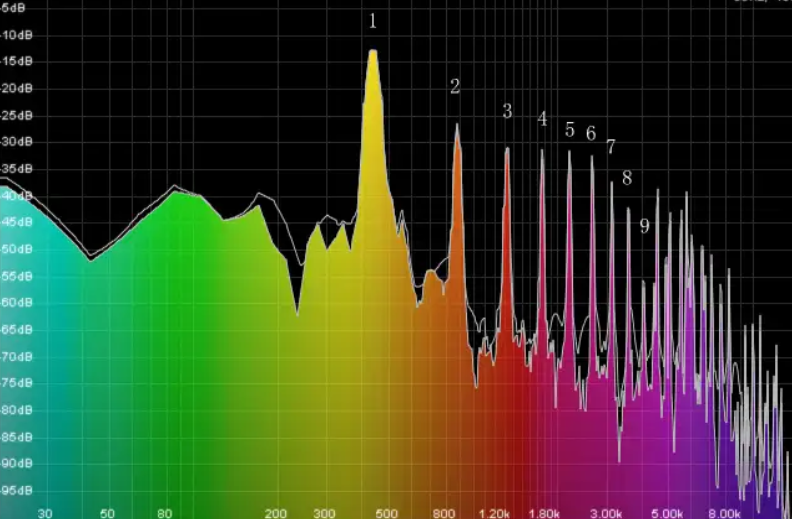

基音，以及基音整数倍频率的音，称为**自然泛音列**——设基音为f，则它的自然泛音列为f，2f，3f，4f……

两个音的自然泛音列中，如果**它们的共有泛音越多，且这些共有的泛音的频率越低，则它们听起来则更加和谐**。

比如，考虑100Hz比200Hz，100Hz比150Hz，下面绘制它们的自然泛音列到3000Hz，同时对共有泛音进行连线。

'_100_200_count=15 _100_150_count=5 _150_200_count=5'

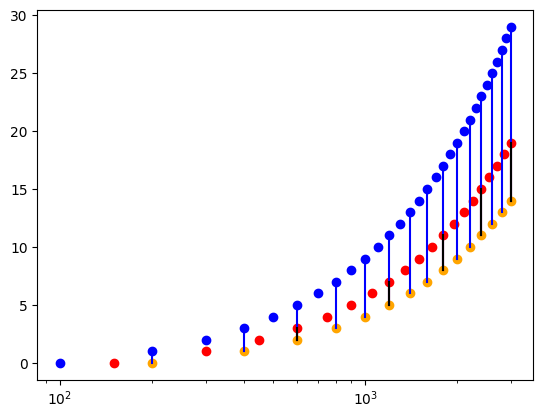

In [2]:
def harmonic_series(f: float, n: int):
    x = f
    for _ in range(n):
        yield x
        x += f

*_100, = harmonic_series(100, 30)
*_150, = harmonic_series(150, 20)
*_200, = harmonic_series(200, 15)
plt.xscale('log')
plt.scatter(_100, range(30), c='blue')
plt.scatter(_150, range(20), c='red')
plt.scatter(_200, range(15), c='orange')

_100_200_count = 0
_100_150_count = 0
_150_200_count = 0
for i, f in enumerate(_200):
    if f in _100:
        _100_200_count += 1
        plt.plot([f, f], [_100.index(f), i], color='blue')
    if f in _150:
        _100_150_count += 1
        plt.plot([f, f], [_150.index(f), i], color='red')
for i, f in enumerate(_150):
    if f in _200:
        _150_200_count += 1
        plt.plot([f, f], [_200.index(f), i], color='black')

f'{_100_200_count=} {_100_150_count=} {_150_200_count=}'


容易发现，100Hz和200Hz的自然泛音列中有大量的共有泛音，100Hz和150Hz，150Hz和200Hz的共有泛音则相对较少，但仍旧是比较多的。

我们再尝试播放一下从200Hz切换到400Hz，和从200Hz切换到300Hz的声音（也就是把上面的频率都乘以了2，这是不会影响共有泛音的数量的），以及200Hz到282Hz

In [3]:
from IPython.display import HTML, Javascript

display(HTML(f"""
<button class="_200_400seq">200Hz-400Hz顺序</button>
<button class="_200_300seq">200Hz-300Hz顺序</button>
<button class="_200_282seq">200Hz-282Hz顺序</button>
<button class="_200_400para">200Hz-400Hz同时</button>
<button class="_200_300para">200Hz-300Hz同时</button>
<button class="_200_282para">200Hz-282Hz同时</button>
"""))
PLAY_TONE_JS_DEF = """
// 来自 GPT
async function playToneAsync(frequency, duration) {
  return new Promise((resolve, reject) => {
    const audioCtx = new (window.AudioContext || window.webkitAudioContext)();
    const oscillator = audioCtx.createOscillator();
    const gainNode = audioCtx.createGain();
    oscillator.type = 'sine';
    oscillator.frequency.setValueAtTime(frequency, audioCtx.currentTime);
    oscillator.connect(gainNode);
    gainNode.connect(audioCtx.destination);
    gainNode.gain.setValueAtTime(1, audioCtx.currentTime);
    oscillator.start();
    setTimeout(() => {
      gainNode.gain.linearRampToValueAtTime(0, audioCtx.currentTime + 0.1);
      setTimeout(() => {
        oscillator.stop();
        audioCtx.close(); // 关闭音频上下文
        resolve(); // 完成
      }, 100);
    }, duration);
    //错误处理  (虽然不太可能出现严重错误，但为了完整性)
    oscillator.onended = () => {
      audioCtx.close();
    };
    oscillator.onerror = (err) => {
        audioCtx.close();
        reject(err);
    };
  });
}
"""
display(Javascript(PLAY_TONE_JS_DEF + """

document.querySelectorAll("._200_400seq")[0].onclick = async () => {
    await playToneAsync(200, 500)
    await playToneAsync(400, 500)
}
document.querySelectorAll("._200_300seq")[0].onclick = async () => {
    await playToneAsync(200, 500)
    await playToneAsync(300, 500)
}
document.querySelectorAll("._200_282seq")[0].onclick = async () => {
    await playToneAsync(200, 500)
    await playToneAsync(282, 500)
}
document.querySelectorAll("._200_400para")[0].onclick = async () => {
    await Promise.all(playToneAsync(200, 500), playToneAsync(400, 500))
}
document.querySelectorAll("._200_300para")[0].onclick = async () => {
    await Promise.all(playToneAsync(200, 500), playToneAsync(300, 500))
}
document.querySelectorAll("._200_282para")[0].onclick = async () => {
    await Promise.all(playToneAsync(200, 500), playToneAsync(282, 500))
}
"""))


<IPython.core.display.Javascript object>

能发现，200Hz-400Hz 比上 200Hz-300Hz更为和谐，200Hz-282Hz就很……恐怖。

实践证明，**两个音的频率比例如果出现在自然泛音列中，且比例的分子分母越小，听起来就越和谐**，比如1：2就比2：3，比3：4更和谐，此外，**2：3相较于1：3更和谐**。

实践也证明，1：1是最和谐的比例，除此之外则是1：2了，但它足够和谐，**以至于我们在实践上认为音高比例是1：2的两个音是同一个音**。

同时，这里也能注意一个事实——`2f-3f`同时演奏，和`4f-6f`同时演奏，它们的**听感是几乎一样的**，这证明，两个音之间的**相对音高关系（比例关系）是比它们的绝对关系更重要的**，更容易被耳朵捕捉到。

考虑一个音f，考虑区间`[f, 2f)`（前闭后开），我们能发现这个区间中的音将其音高乘以2后，在`[2f, 4f)`上都有它们的相同的音，为此，我们可以对音进行分组——`[f, 2f)`为一组，`[2f, 4f)`为一组，`[4f, 8f)`为一组以此类推，而每一个音都会在其中的每一组出现，它们之间的音高是2的幂的关系。我们把这每一组称为**八度 Octave**，同时称音高比例是$1:2^n$ 的两个音，是**同一个音的不同八度**。

这里的八度，为什么是“八”呢？这是来自西方音乐的音阶体系，这里只需要知道这个“八”是一种习惯命名法，它是相对而非绝对的，在一个不同的音乐体系里完全可以不是8。

# 五度相生律和十二平均律

现在，我们知道，`[f, 2f)`是一组，`[2f, 4f)`是一组，我们把无穷的音域分割成一个组一个组来方便研究，该看看`[f, 2f)`里面有什么东西了。

上面我们知晓了f，2f，4f……它利用了1：2的关系，极为和谐以至于我们认为它们是同一个音；而显然对这同一个音我们是无法搞出音乐来的，得来点其他元素。显然我们现在只能**研究其他更加不和谐的比例**，比如2：3。

**考虑2：3**，我们反复地将f乘以`3/2`即1.5，会得到什么呢？自己以及前12个值，以及这些值和它们对应的分组开始值的比例为：

In [4]:
from prettytable import PrettyTable
def octave_scale(v):
    i = 1
    while v // i > 1:
        i *= 2
    return v / i

f = 1
tb = PrettyTable(['', *map(str, range(0, 13, 1))])
tb.float_format = '.3'
tb.add_row(['绝对值', *map(lambda i: f * ((3/2) ** i), range(0, 13, 1))])
tb.add_row(['组比例', *map(lambda i: octave_scale(f * ((3/2) ** i)), range(0, 13, 1))])
tb

,0,1,2,3,4,5,6,7,8,9,10,11,12
绝对值,1.000,1.500,2.250,3.375,5.062,7.594,11.391,17.086,25.629,38.443,57.665,86.498,129.746
组比例,1.000,1.500,1.125,1.688,1.266,1.898,1.424,1.068,1.602,1.201,1.802,1.352,1.014


可以发现，$\frac{3}{2}^{12}f \approx 129.746f \approx 2^{7}f$，也就是说f以`3/2`的比例往上走12次后，就达到了f的7个八度的音高，继续往上走又会是另一个循环。我们**把这12个音都放到同一个分组里**，从而就在`[f, 2f)`中得到12个音供使用。我们将这些音做排序，就得到：

In [5]:
tb = PrettyTable(['', *map(str, range(0, 13, 1))])
tb.float_format = '.3'
tb.add_row(['值', *map(lambda i: f * ((3/2) ** i), range(0, 13, 1))])
tb.add_row(['相似比例', *map(lambda i: octave_scale(f * ((3/2) ** i)), range(0, 13, 1))])
tb

,0,1,2,3,4,5,6,7,8,9,10,11,12
值,1.000,1.500,2.250,3.375,5.062,7.594,11.391,17.086,25.629,38.443,57.665,86.498,129.746
相似比例,1.000,1.500,1.125,1.688,1.266,1.898,1.424,1.068,1.602,1.201,1.802,1.352,1.014


我们将这些音按音高进行排序（最后一个音手动设置为2f），检查它们和f的比例，以及它们和前一个音的比例：

In [6]:
*scale, = *map(lambda i: octave_scale(f * ((3/2) ** i)), range(0, 12, 1)), 2.0
scale = sorted(scale)
head, *tail = scale
tb = PrettyTable(['', *map(str, range(0, 13, 1))])
tb.float_format = '.4'
# tb.add_row(['值', *map(lambda i: f * ((3/2) ** i), range(0, 13, 1))])
tb.add_row(['音高比例', *scale])
tb.add_row(['相对比例', '-', *map(lambda x: x[1] / x[0], zip(scale, tail))])
tb

,0,1,2,3,4,5,6,7,8,9,10,11,12
音高比例,1.0000,1.0679,1.1250,1.2014,1.2656,1.3515,1.4238,1.5000,1.6018,1.6875,1.8020,1.8984,2.0000
相对比例,-,1.0679,1.0535,1.0679,1.0535,1.0679,1.0535,1.0535,1.0679,1.0535,1.0679,1.0535,1.0535


能够发现，这里**相邻的两个音之间的比例均在1.05-1.06之间**，我们可以近似地认为**它们两两之间的比例（后面就均称作音程Interval）**是相等的，我们**假设这个音程是我们能操作的最小的音程**，我们把它称作**半音Half Step（或Semitone，Half Tone）**；两个半音则称为**全音Tone（或Whole Step）**。

通过反复地将一个音f向上乘以`3/2`，得到12个音（第13个后就达到了f的某个八度，然后开始下一个循环），然后把这12个音塞到同一个组里得到12个半音的音高，这就是所谓的**五度相生律**。注意这里的**五度**和上面的**八度**一样，同样是西方音乐的约定俗成，是根据七声音阶CDEFGAB，我们才把3：2这个比例关系称为“五度”，同样地，把2：1这个比例关系称为“八度”；离开了七声音阶，这两个比例关系仍旧被大量使用。

在上面，我们假设这十三个音之间的音程是相等的，但在五度平均律中，它们实际上是不等的，而且随着增加更多的八度，偏差会越来越大，如何解决呢？换句话说，我们如何找到这样的关系，让前一个音和后一个音的比例关系恒定，且往后找12个音时，得到的正好是当前音高的两倍呢？很显然——这是一个等比数列，对于往后的第n个音，有：

$$
f(n) = 2^{\frac{n}{12}}
$$

它支持上面说的关系：

$$\begin{aligned}
\frac{f(n)}{f(n-1)} & = \frac{2^{\frac{n}{12}}}{2^{\frac{n-1}{12}}}  = {2}^{\frac{1}{12}} \approx 1.0595 \\
f(12) & = 2^{\frac{12}{12}}  = 2
\end{aligned}$$

这样硬性规定两个半音之间的音程的方式，叫**十二平均律**——这里的“十二”比“五度”，“八度”更为普适——它是数学和物理得到的结果。**十二平均律牺牲了音程关系上的完美，但是换来了数学上的优美和简便，在分析和实用上均带来巨大的优势**。后面均以十二平均律作为心智模型。

下面展示了十二平均律下各音的相对音高：

In [7]:
tb = PrettyTable([*map(str, range(0, 13, 1))])
tb.add_row([*map(lambda x: 2 ** (x/12), range(0, 13, 1))])
tb.float_format = '.3'
tb

0,1,2,3,4,5,6,7,8,9,10,11,12
1.000,1.059,1.122,1.189,1.260,1.335,1.414,1.498,1.587,1.682,1.782,1.888,2.000


## 为什么是3：2

说到底，为什么是3：2这个比例呢？还有其它比例可以用来构造半音吗？答案是有的，只是基本不常用。这是因为，3：2和2：1在数学上是比较亲和，3：2 需要更少的音就能**闭合**，即找到一个八度且偏差较低，其他的比例要么是需要更多的音，要么是闭合地不够完美，偏差太大。这也是为什么说它是普适的——外星人也会搞出来五度相生律和十二平均律，因为背后是数学。

# 音名，音阶，调式，调性

十二平均律是自然而然得到的结果，外星人来了（只要它们耳朵构造和我们是类似的），也会搞出类似的东西，但CDEFGAB，哆来咪发唆拉希这些名字又是怎么来的呢？它们则是来自于约定俗成和文化差异，外星人几乎肯定会搞出自己的那一套。想搞出来CDEFGAB，就没法像构造出五度相生律那样去一步一步推导了，而是引入各种各样的“约定”，因为**它们并不是唯一的发展方向**。

我实在没能力去干这事儿，直接囫囵吞枣了，但这个也好记——**以钢琴为心智模型**去记忆。钢琴中，白键-黑键是一个半音，白键-白键是一个全音（如果中间有黑键）、半音（中间没有黑键）。

要引入一个**音阶Scale**——从一个**根音Root**往上走，直到达到另一个根音，其中涉及到的音的序列——就需要找到一个出发点。我们将钢琴看作3个黑键及其周围的4个白键，以及2个黑键及其周围的3个黑键，将这12个键认为是一组（一个八度），这时，3个黑键中第一个黑键的左边的这个白键就是我们的“根音”。

我们将这个音命名为**C**，往上对所有的白键命名：向上一个全音得到**D**，向上一个全音得到**E**，一个半音得到**F**，一个全音得到**G**，一个全音得到**A**，一个全音得到**B**，再一个半音得到**C**。

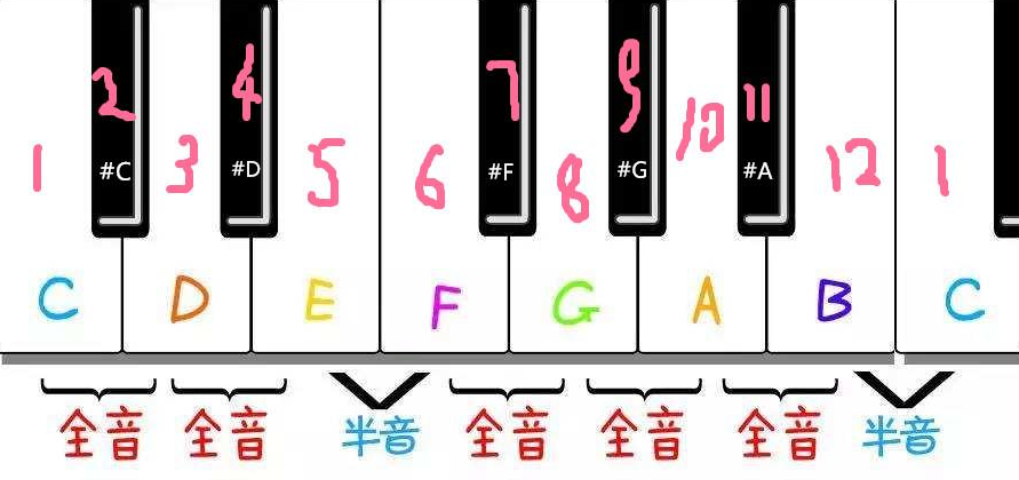

注意——钢琴上的白键和黑键的地位是完全相等的，我们可以从任何一个键开始去给它们命名，只是CDEFGAB这套用得最广泛。

这里，我们就得到了**CDEFGAB七个音名 Pitch**，使用这七个音名表示的音阶就叫**七声音阶**。更具体的说，这里的“全全半全全全半”，称为**调式 Mode**，利用调式我们便能从任意根音去推导出音阶。对应的是七声大调音阶或自然大调音阶，更具体的说，是Ionian音阶。

**全全半全全全半是调式，CDEFGAB是音阶**。但这里还有一个**调性Key**的概念，可以认为**调性=调式+根音，而音阶是属于特定调性的音阶**，在尝试研究音阶CDEFGAB中的音程关系时，我们是在研究**C大调这个调性**，这个音阶称为C大调音阶，而调式是一个更抽象、广泛的东西，它过于广泛，以至于研究它很难带来有实践意义的结论。

> GPT说这是因为和弦研究中是基于绝对音名的，这就导致必须要有一个根音去做定位，所以才引入调性……行吧，不多想

从每个C到下一个C（前闭后开），就是前面所说的八度，这就是这里的“八”的来源——CDEFGABC，总共8个音；从C到当前八度中的G容易发现它们的比例即为2：3，因此2：3称为五度——CDEFG。

钢琴上可以分为多个八度，每一个八度使用一个数字去标识，如C4表示钢琴中最中间的一个八度。**只有音名和八度编号组合才能唯一地标识一个音的音高**，比如**A4通常称为国际标准音高**，它的音高是440Hz，常用的**中央C**指的是C4，音高是261Hz。

但是，并非是从C开始能够唯一地得到一个七声大调音阶，只要维持音程关系，能够从任何一个根音开始触发得到听感类似的音阶。比如，从G开始，能得到G，A，B，C，D，E，F#，G音阶，这个音阶称为G大调音阶，以C为根音则是C大调音阶。这和上面的现象是一样的——**耳朵更关注两个或多个音的相对音高关系，即音程，而非绝对音高关系，即频率**；比如C到D，和D到E，如果在此前没有任何基准的话，我们甚至无法区分它们（除非你是绝对音感，但这里不考虑这个）

# 绝对音名、相对音名、唱名

上面CDEFGAB，它们是所谓的**绝对音名Absolute Pitch**，这是因为，**每个音会有固定的频率**，给出一个绝对音名（要包含八度编号），我们就能唯一地得出它的频率，比如A4是440Hz，Ax（x是八度记号）是440Hz乘以2的某次幂。

而哆来咪发唆拉希这些，它们则是所谓的**相对音名Relative Pitch**，或者叫**唱名Solfege**。这是因为，**每个音的频率是相对的，只有两个音之间的音程关系是绝对的**，比如我们唱的 Do Rai Mi Fa Sol La Ti（或者简谱中的1234567，它们是同义的），它们可以对应任意一串音，但要保证Do和Rai之间是一个全音，Rai和Mi是一个全音……

我们只需要**规定其中任何一个音对应的音高，便可以找到其他的音对应的音高**，比如我们规定Do=C，则它们对应的就会是CDEFGAB，Do=G时，则它们对应的就会是G A B C D E F# G。我们通常会去规定根音对应的绝对音名。

在现代音乐中，可以说**相对唱名是更加重要的——我们更关心音程，和声、调式而非音高**，而在相对音名上研究它是更合适的。

像吉他这种乐器，就特别适合使用相对唱名——改变主音不改变指法，只需要在指板上移动位置即可；而钢琴这种就更适合绝对唱名了，每个调有自己的指法。

上面说的唱名实际上指的是**首调唱名法**，此外还有**固定调唱名法**，它则是直接把CDEFGAB固定到特定的音名上去，本质上其实就是使用绝对音名。

# 修饰音

上面莫名出现了F#，这种音称为修饰音Accidentals，它们在原始的音上做**修改**，比如#符号表示升半音，b符号表示降半音。从钢琴的心智模型上能够发现：C#=Db，D#=Eb，E#=F，F#=Gb，G#=Ab，A#=Bb，B#=C，通过修饰音，我们便能够去为钢琴上的黑键命名。

此外，还有重升x、重降bb符号，表示升高或降低一个全音。

注意到，一个音是可以有多个名字的，这就需要我们在使用时作出约定，我们约定：

1. 在一个音阶中，相邻的两个音，它们的字母必须相邻，如C-D#，G-Ab，B-C#这样
2. 在一个自然音阶（大调、小调等）中，不会同时出现升号和降号

# “度”，音程

既然已经有素材（音名），终于可以谈音程了，音阶中的音程决定了音阶带给人的感觉。但在此之前，先谈谈**度**，英语中对这个“度”字没有术语，我们使用XX度去描述两个音的音程。

像C和C，这样中间没有差距的，或者说只出现一个字母的，我们称为**一度Unison**；注意：**C和C#同样称为一度**。

像C和D这样中间出现两个字母的，称为**两度Second**，注意，C和D，C和Db均称为两度，但C和C#称为一度。

C和E这样就是**三度Third**，C和F就是**四度Fourth**……以此类推，它们都是英文的序数词，直到**八度Octave**，这也是八度的“八”的由来。

容易发现，即使度数相同，它们实际对应的音程也是不同的——比如C和E是4个半音，而D和F是3个半音，而它们都是三度，所以需要更细节的描述。我们会在音程前面加上纯Pure、大Major、小Minor、增Augmented、减Diminished等修饰词，更细节和唯一地描述音程。

考虑C-C（自身），C-C（高一个八度），C-G，C-F，它们对应的是自然泛音列中的1：1，2：1，3：2，4：3的关系，因此听起来非常和谐，因此我们把它们称为**纯一度Pure Unison，纯八度Pure Octave、纯五度Pure Fifth、纯四度Pure Fourth**，它们的音程分别是0，12，7，5个半音。

纯四度和纯五度之间夹着最不和谐的音程——**三全音Tritone**，或者叫**增四度Augmented Fourth**，**减五度Diminished Fifth**，音程是6个半音。

二度、三度、六度、七度，则分别有大、小之分。总之……可以列个表。其中没有展示所有理论存在的音程。

In [8]:
tb = PrettyTable(['度数/半音数', *map(str, range(0, 13))])
tb.add_row(['一度', *['纯一度','','','','','','','','','','','','']])
tb.add_row(['二度', *['','小二度','大二度','增二度','','','','','','','','','']])
tb.add_row(['三度', *['','','','小三度','大三度','增三度','','','','','','','']])
tb.add_row(['四度', *['','','','','减四度','纯四度','增四度','','','','','','']])
tb.add_row(['五度', *['','','','','','','减五度','纯五度','增五度','','','','']])
tb.add_row(['六度', *['','','','','','','','减六度','小六度','大六度','增六度','','']])
tb.add_row(['七度', *['','','','','','','','','','','小七度','大七度','增七度']])
tb.add_row(['八度', *['','','','','','','','','','','','','纯八度']])
tb

度数/半音数,0,1,2,3,4,5,6,7,8,9,10,11,12
一度,纯一度,,,,,,,,,,,,
二度,,小二度,大二度,增二度,,,,,,,,,
三度,,,,小三度,大三度,增三度,,,,,,,
四度,,,,,减四度,纯四度,增四度,,,,,,
五度,,,,,,,减五度,纯五度,增五度,,,,
六度,,,,,,,,减六度,小六度,大六度,增六度,,
七度,,,,,,,,,,,小七度,大七度,增七度
八度,,,,,,,,,,,,,纯八度


# 音程的一些规律

音程运算是很重要的，记录一些规律以帮助运算。

注意到：**向上X个半音，等于向下（12-X）个半音，然后往上加一个八度**。这个对记忆是比较重要的，比如：

1. C-F是纯四度（5半音），F-C是纯五度（7半音）
2. C-G是纯五度，G-C是纯四度
3. C-E是大三度，E-C是小六度
4. C-B是大七度，B-C是小二度

容易发现，如果音程a-b是大x度，则b-a是小（9-x）度（反之亦然）；a-b是纯x度，则b-a是纯（9-x）度。如果发现音程a-b比较大，难以一瞬间想到，那就尝试研究一下b-a。当然，这里说的是一个八度中的音程的情况。

还发现，两个纯八度的和是十五度——CDEFGABCDEFGABC总共15个字母，每次加一个八度，数字加七。

In [9]:
print('a-b的音程：')
tb = PrettyTable(['a\\b', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'C '])
tb.add_row(['C', '-', '大二度', '大三度', '纯四度', '纯五度', '大六度', '大七度', '纯八度'])
tb.add_row(['D', '小七度', '-', '大二度', '小三度', '纯四度', '纯五度', '大六度', '小七度'])
tb.add_row(['E', '小六度', '小七度', '-', '小二度', '小三度', '纯四度', '纯五度', '小六度'])
tb.add_row(['F', '纯五度', '大六度', '大七度', '-', '大二度', '大三度', '增四度', '纯五度'])
tb.add_row(['G', '纯四度', '纯五度', '大六度', '小七度', '-', '大二度', '大三度', '纯四度'])
tb.add_row(['A', '小三度', '纯四度', '纯五度', '小六度', '小七度', '-', '大二度', '小三度'])
tb.add_row(['B', '小二度', '小三度', '纯四度', '减五度', '小六度', '小七度', '-', '小二度'])
tb.add_row(['C', '纯一度', '大二度', '大三度', '纯四度', '纯五度', '大六度', '大七度', '-'])
tb

a-b的音程：


a\b,C,D,E,F,G,A,B,C
C,-,大二度,大三度,纯四度,纯五度,大六度,大七度,纯八度
D,小七度,-,大二度,小三度,纯四度,纯五度,大六度,小七度
E,小六度,小七度,-,小二度,小三度,纯四度,纯五度,小六度
F,纯五度,大六度,大七度,-,大二度,大三度,增四度,纯五度
G,纯四度,纯五度,大六度,小七度,-,大二度,大三度,纯四度
A,小三度,纯四度,纯五度,小六度,小七度,-,大二度,小三度
B,小二度,小三度,纯四度,减五度,小六度,小七度,-,小二度
C,纯一度,大二度,大三度,纯四度,纯五度,大六度,大七度,-


# 修饰音唱名

我们的唱名是 Do Re Mi Fa So Ra Ti Do，它们是自然音阶来的，但修饰音呢？带修饰音的唱名随上行下行，读法不同：

In [10]:
tb = PrettyTable([r'', *map(str, range(0, 13, 1))])
tb.add_row(['自然音阶', 'Do', '', 'Re', '', 'Mi', 'Fa', '', 'So', '', 'La', '', 'Ti', 'Do'])
tb.add_row(['上行', '', 'Di', '', 'Ri', '', '', 'Fi', '', 'Si', '', 'Li', '', ''])
tb.add_row(['下行', '', 'Ra', '', 'Me', '', '', 'Se', '', 'Le', '', 'Te', '', ''])

tb

,0,1,2,3,4,5,6,7,8,9,10,11,12
自然音阶,Do,,Re,,Mi,Fa,,So,,La,,Ti,Do
上行,,Di,,Ri,,,Fi,,Si,,Li,,
下行,,Ra,,Me,,,Se,,Le,,Te,,


注意到：

1. 上行时，末位改为`i`
2. 下行时，末尾改为`e`（Re♭例外，它是改为`Ra`）

但只有做音阶练习时才这么读，实际读谱时，**按铺面上的标注读，无论上行下行**，比如G大调的F#，始终读作Fi，无论上行下行

最后，再回到上面的五度相生律的推导，我们检查每个音和根音的比例关系，这次使用分数，能够发现，结果仍旧是不尽如人意——除了3/2和9/8，剩下的音程都太过复杂，显然**五度相生律不等于纯律**。

In [11]:
from prettytable import PrettyTable
def octave_scale(v):
    i = 1
    while v // i > 1:
        i *= 2
    return v / i

from fractions import Fraction
f = 1
tb = PrettyTable(['', *map(str, range(0, 13, 1))])
tb.float_format = '.3'
tb.add_row(['绝对值', *map(lambda i: f * (Fraction(3, 2) ** i), range(0, 13, 1))])
tb.add_row(['组比例', *map(lambda i: octave_scale(f * (Fraction(3, 2) ** i)), range(0, 13, 1))])
tb.add_row(['音名', 'C', 'G', 'D', 'A', 'E', 'B', 'F#', 'Db', 'Ab', 'Eb', 'Bb', 'F', 'C'])
tb.add_row(['音程', '一度', '纯五度', '大二度', '大六度', '大三度', '大七度', '三全音', '小二度', '小六度', '小三度', '小七度', '纯四度', '八度'])
display(tb)

,0,1,2,3,4,5,6,7,8,9,10,11,12
绝对值,1,3/2,9/4,27/8,81/16,243/32,729/64,2187/128,6561/256,19683/512,59049/1024,177147/2048,531441/4096
组比例,1,3/2,9/8,27/16,81/64,243/128,729/512,2187/2048,6561/4096,19683/16384,59049/32768,177147/131072,531441/524288
音名,C,G,D,A,E,B,F#,Db,Ab,Eb,Bb,F,C
音程,一度,纯五度,大二度,大六度,大三度,大七度,三全音,小二度,小六度,小三度,小七度,纯四度,八度


# 音程计算

两个音程是可以合成的，把音程当作一种位移的话，两个音程的和就是两次位移的综合。

音程计算有如此规律，考虑音程A，B：

1. 结果音程的度数 = 音程A的度数 + B的度数 - 1（纯四度加纯五度等于八度，小二度加小二度等于减三度，纯八度加纯八度等于纯十五度）
2. 小于等于八度（这里只提度数）的音程称为**单音程**，其他的是**复音程**，**一个音程增加纯八度后，不改变它的修饰符**——大三度加纯八度等于大十度，或复大三度。
3. 如果A + B = 纯八度，则 B = 纯八度 - A（之前学过的这个），此时，B称为A的**转音程**
4. 纯四度加纯五度等于纯八度，纯四加纯四为小七度，纯五加纯五为大九度，纯四加纯四加纯四（加纯五减大二）等于小十度（单音程是小三度）